# Data Analysis of Zuber - Rides App 
## Importing libraries, reading dataframes and data overview

In [68]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

# Reading dataframes
df1 = pd.read_csv('../project_sql_result_01.csv')
df2 = pd.read_csv('../project_sql_result_04.csv')

# Data overview
print(df1.head(10))
print()

df1.info()
print()

print(df2.head(10))
print()

df2.info()
print()

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667


### Checking if there are duplicated information

In [69]:
# Counting duplicated values at in the Dataframe df1
total_duplicates1 = df1.duplicated().sum()
print("Total duplicados df1:", total_duplicates1)

# Counting duplicated values at in the Dataframe df2
total_duplicates2 = df2.duplicated().sum()
print("Total duplicados df2:", total_duplicates2)

Total duplicados df1: 0
Total duplicados df2: 0


### Comments
1. No values missing in any dataframe.
2. Data types are accurate.
3. Column titles are as expected (snake_case way of writing).
4. No values duplicated in any dataframe.

Ready to go!

## Identifying the top 10 destination neighborhoods

In [70]:
top10_destination = df2.sort_values(by='average_trips', ascending=False).round(2).head(10)
top10_destination

,dropoff_location_name,average_trips
0,Loop,10727.47
1,River North,9523.67
2,Streeterville,6664.67
3,West Loop,5163.67
4,O'Hare,2546.90
5,Lake View,2420.97
6,Grant Park,2068.53
7,Museum Campus,1510.00
8,Gold Coast,1364.23
9,Sheffield & DePaul,1259.77


## Visualizing data

### Top 10 destination neighborhoods Plot

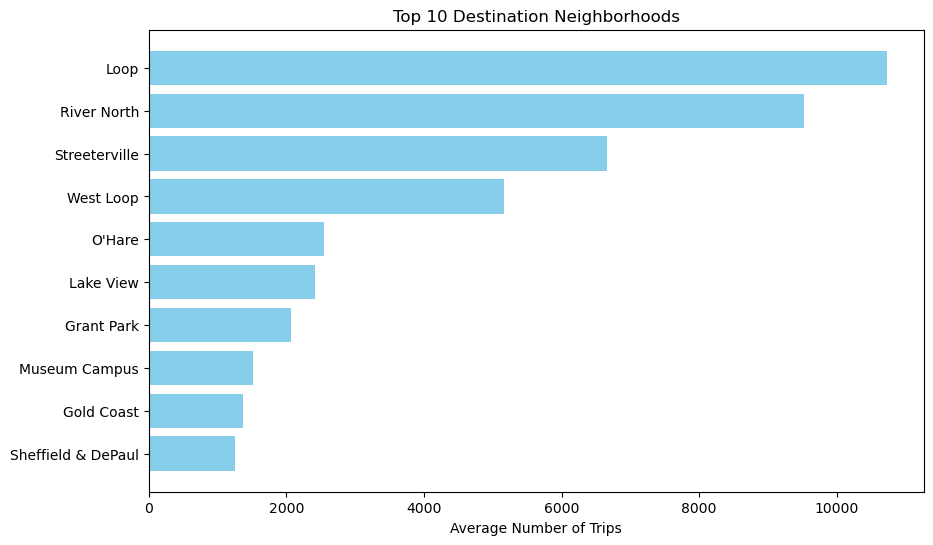

In [71]:
# Creating bar plot for the top 10 destination neighborhoods
plt.figure(figsize=(10, 6))
plt.barh(top10_destination['dropoff_location_name'], top10_destination['average_trips'], color='skyblue')
plt.xlabel('Average Number of Trips')
plt.title('Top 10 Destination Neighborhoods')
plt.gca().invert_yaxis()  # Invert y-axis and x-axis
plt.show()

### Conclusions
The top 10 destination neighborhoods are Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul. The top four destinations are the main destinations.

### Top 10 taxi companies plot

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


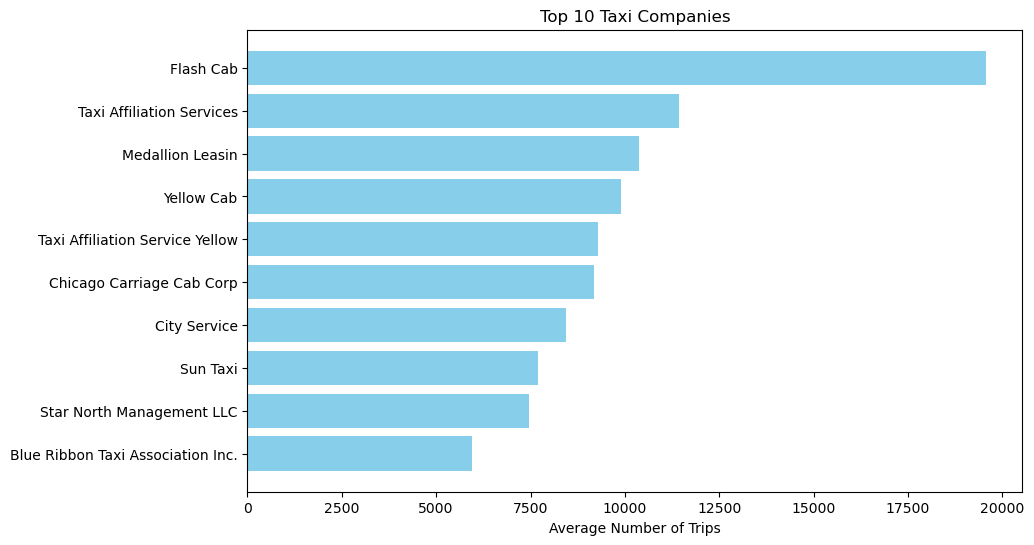

In [72]:
# Identifying the top 10 taxi companies
top10_taxi_companies = df1.sort_values(by='trips_amount', ascending=False).head(10)
print(top10_taxi_companies)

# Creating bar plot for the top 10 taxi companies 
plt.figure(figsize=(10, 6))
plt.barh(top10_taxi_companies['company_name'], top10_taxi_companies['trips_amount'], color='skyblue')
plt.xlabel('Average Number of Trips')
plt.title('Top 10 Taxi Companies')
plt.gca().invert_yaxis()  # Invert y-axis and x-axis
plt.show()

### Conclusions
The top 10 taxi companies are: Flash Cab, Taxi Affiliation Services, Medallion Leasing, Yellow Cab, Taxi Affiliation Service Yellow, Chicago Carriage Cab Corp, City Service, Sun Taxi, Star North Management LLC, Blue Ribbon Taxi Association Inc. Flash Cab is the preferred one.

## Testing Hipothesis


Ele contém dados sobre viagens do Loop para o Aeroporto Internacional O'Hare. Lembre-se, estes são os valores dos campos da tabela:

start_ts
data e hora de coleta

weather_conditions
condições meteorológicas no momento em que a corrida começou

duration_seconds
duração da corrida em segundos

Teste a hipótese:

"A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos." 

Decida onde definir o nível de significância (alfa) por conta própria.

Explique:

como você formou as hipóteses nula e alternativa
qual critério você usou para testar a hipótese e porque

In [73]:
# The resulting dataframe contains data on trips from the Loop to O'Hare International Airport.
# Reading SQL results dataframe
df3 = pd.read_csv('../project_sql_result_07.csv')

# Data overview
print(df3.head(10))
print()

df3.info()
print()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good            2460.0
9  2017-11-11 12:00:00               Good            2040.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-nul

Q1:  1438.25
Q3:  2580.0
IQR:  1141.75
mín:  0
máx:  4292.625


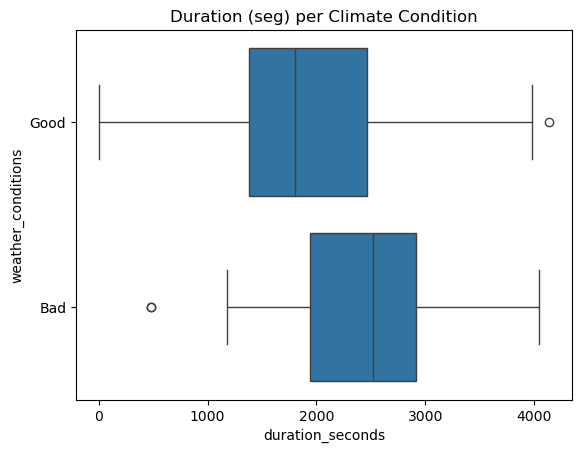

In [74]:
# Removing outliers
Q1 = df3['duration_seconds'].quantile(0.25)
Q3 = df3['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

#
inf_limite = Q1 - (1.5* IQR)
sup_limite = Q3 + 1.5 * IQR
if inf_limite < 0:
    inf_limite = 0
print('mín: ', inf_limite)
print('máx: ', sup_limite)


# Removing Outliers
climate_no_outliers = df3.query('duration_seconds <= @sup_limite')
sns.boxplot(x="duration_seconds", y="weather_conditions", data=climate_no_outliers).set_title('Duration (seg) per Climate Condition')
plt.show()

In [75]:
"""
The null hypothesis (H0) will be: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare não muda nos sábados chuvosos.
The alternative hypothesis will be: "A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.
The alpha threshold will be: 0.05
"""

# Filtering data per weather condition and taking the duration column
good_weather = df3[df3['weather_conditions'] == "Good"]['duration_seconds']
bad_weather = df3[df3['weather_conditions'] == "Bad"]['duration_seconds']

# Calculating means
mean_good = good_weather.mean()
mean_bad = bad_weather.mean()

# Critical statistical significance (threshold)
alpha = 0.05

# Student's t-test for two independent samples. Use equal_var=False for unequal variances
t_stat, p_value = st.ttest_ind(good_weather, bad_weather, equal_var=False)

# Output results
print(f"Mean Duration on Good Weather: {mean_good:.2f}")
print(f"Mean Duration on Bad Weather: {mean_bad:.2f}")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Hypothesis test result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in trip durations.")
else:
    print("Fail to reject the null hypothesis: No significant difference in trip durations.")

Mean Duration on Good Weather: 1999.68
Mean Duration on Bad Weather: 2427.21
T-statistic: -7.19, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in trip durations.


### Conclusions
1. The null hypothesis were formulated assuming that there is no effect or difference between the study conditions. The alternative hypothesis were one in which there is an effect or difference.
2. It was used the Student's t-test for two independent samples to analyze the data, considering a significance level of 0.05.